In [71]:
import torch
from scipy import integrate

# Monderer's Prisoner's dilemma

In [23]:
G = torch.tensor([
    [ [1.,1], [9,0]],
    [ [0,9], [6,6]]
])

P = torch.tensor([
    [4.,3],
    [3,0]
])

In [213]:
def u(i, x1, x2):
    return (torch.cat([x1, 1-x1]).t() @ G[:, :, i-1] @ torch.cat([x2,1-x2]))

    # (Gy)[1] * x1 + (Gy)[2] ((1-x1))
    # Gy[1] - Gy[2]

def du1x1(x1,x2):
    return torch.tensor([1., -1]).t() @ G[:, :, 0] @ torch.tensor([x2,1-x2])

def du2x2(x1,x2):
    return torch.tensor([x1, (1-x1)]).t() @ G[:, :, 0] @ torch.tensor([1.,-1.])

def duixi(i,x1,x2):
    return du1x1(x1,x2) if i == 1 else du2x2(x1,x2)

def phi(x1, x2):
    return (torch.tensor([x1,1-x1]).t() @ P @ torch.tensor([x2,1-x2]))

In [230]:
x1 = torch.tensor(torch.rand(1))
y1 = torch.rand(1)
x2 = torch.tensor(torch.rand(1))
y2 = torch.rand(1)

[[u(1,x1,x2) - u(1,y1,x2), phi(x1,x2) - phi(y1,x2)],
 [u(1,x1,x2) - u(1,y1,x2), potential(x1,x2) - potential(y1,x2)],
 [u(2,x1,x2) - u(2,x1,y2), phi(x1,x2) - phi(x1,y2)],
 [u(2,x1,x2) - u(2,x1,y2), potential(x1,x2) - potential(x1,y2)]
]

/opt/anaconda/anaconda3/envs/bnelearn/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/opt/anaconda/anaconda3/envs/bnelearn/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


[[tensor(0.2084), tensor(0.2084)],
 [tensor(0.2084), -0.1702523900007762],
 [tensor(0.9873), tensor(0.9873)],
 [tensor(0.9873), -0.20918495639494417]]

In [215]:
z = torch.tensor([0., 0.])
y = torch.rand(2)

In [216]:
def x(t, y):
    # y ist vector über 2 spieler
    return (1-t)* z + t * y

In [217]:
def dxidt(t,i):
    return y[i-1] - z[i-1]

In [218]:
y = torch.tensor([.33, .66])
x(0.5,y)

tensor([0.1650, 0.3300])

In [238]:
du1x1(*(0.5*y))

tensor(2.1499)

In [239]:
t=0.5
x(t,y), y
duixi(1, *x(t,y))

tensor(2.1499)

In [221]:
def integral(i,y):
    return integrate.quad(
        lambda t: duixi(i, *x(t,y)) * dxidt(t,i),
        0,1
    )[0]

In [229]:
def potential(x1,x2):
    y = torch.tensor([x1,x2])
    return integral(1,y) + integral(2,y)

In [227]:
y = torch.rand(2)
potential(y) - phi(*y)

tensor(-7.6505)

In [248]:
from scipy import ndimage
import numpy as np
n_points = 20
x_, y_ = torch.meshgrid(torch.linspace(0,1,n_points),torch.linspace(0,1,n_points))

In [251]:
z = torch.tensor([potential(x,y) for (x,y) in zip(x_.reshape(-1,1),y_.reshape(-1,1))]).reshape(n_points,n_points)

/opt/anaconda/anaconda3/envs/bnelearn/lib/python3.7/site-packages/ipykernel_launcher.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  after removing the cwd from sys.path.


In [252]:
import matplotlib.pyplot as plt

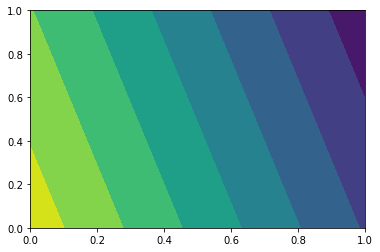

In [253]:
plt.contourf(x_, y_, z)

In [254]:
z2 =  torch.tensor([phi(x,y) for (x,y) in zip(x_.reshape(-1,1),y_.reshape(-1,1))]).reshape(n_points,n_points)

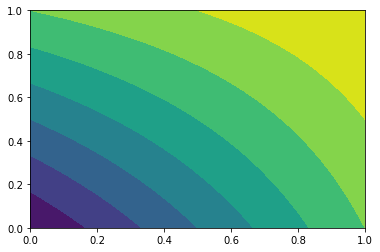

In [256]:
plt.contourf(x_, y_, z2)

# 2 player symmetric FPSB

In [130]:
v = torch.rand(2)
x1 = torch.rand(1)
x2 = torch.rand(1)
x2 = 0
y1 = torch.rand(1)
y2 = torch.rand(1)

In [258]:
def u(i, v, x1, x2):
    x = torch.torch.tensor([x1,x2])
    
    return v[i-1] - x[i-2] if x[i-1]>x[i-2] else 0

def phi(v,x1,x2):
    return u(1,v,x1,x2)


def beta1(v1, x1):
    return v1/(1+x1)

def beta2(v2, x2):
    return v2/(1+x2)

def u_ante(i,x1,x2):
    n_points = 100
    s=0.
    for v1 in torch.linspace(0,1,n_points):
        for v2 in torch.linspace(0,1,n_points):
            s+=u(i,torch.tensor([v1,v2]), beta1(v1,x1), beta2(v2,x2))
    
    return s/(n_points**2)
    
    #return integrate.dblquad(
    #    lambda v1, v2: u(i,torch.tensor([v1,v2]),beta1(v1,x1),beta2(v2,x2)),
    #    0, 1,
    #    lambda v1: 0, lambda v2: 1
    #)[0]

    
    
def phi_ante(x1,x2):
    # reference: Prop 1 in https://www.jstor.org/stable/pdf/2950588.pdf?refreqid=excelsior%3A88bec3e5585cdf52f459c1c4ea3bf38f
    # potential can be written as Phi(x) = u_i(x) - G_i(x_{-i})
    return u_ante(1,x1,x2) - u_ante(1,0,x2)
    

In [140]:
u_ante(1,0,0)

tensor(0.1683)

In [137]:
[[u_ante(1,x1,x2) - u_ante(1,y1,x2), phi_ante(x1,x2) - phi_ante(y1,x2)],
 [u_ante(2,x1,x2) - u_ante(2,x1,y2), phi_ante(x1,x2) - phi_ante(x1,y2)]]

[[tensor(-0.1340), tensor(-0.1340)], [tensor(0.0039), tensor(-0.1324)]]

In [103]:
x1,x2

(tensor([0.4535]), tensor([0.3179]))

In [119]:
torch.linspace(0,1,10)

tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])

In [144]:
z = [lambda x1, v1: 0, lambda x2, v2:0]

In [145]:
y = [lambda x1, v1: beta1(v1,x1), lambda x2, v2: beta2(v2,x2)]

In [149]:
def x(t):
    return t * y